
### Modeling and Evaluation Notebook

**Objectives**
- Answer business requirement 2:
    + The client is interested in predicting if a cherry tree is healthy or contains powdery mildew.

**Inputs**
- inputs/cherry_leaves_dataset/cherry-leaves/train/
- inputs/cherry_leaves_dataset/cherry-leaves/test/
- inputs/cherry_leaves_dataset/cherry-leaves/validation/
- image_embeddings

**Outputs**
1. Images distribution plot in train, validation, and test set
2. Image augmentation
3. Save class_indices
4. Machine learning model creation and training

5. Save model
- It saves the entire trained model to a file in the HDF5 format. 
- This file includes:
    + The model architecture.
    + The model weights.
    + The training configuration (loss, optimizer).
    + The state of the optimizer, so training can be resumed exactly where it was left off.
    
6. Learning curve plot for model performance
- To visually represents the model's learning progression in order to identify issues like overfitting or underfitting.

7. Model evaluation on pickle file
8. Prediction on the random image file

**Additional Comments | Insights | Conclusions**

> **Rationale behind the hyperparameters choices in data modelling:**
- **Filters:** Different numbers of filters are used to capture the variety of features at different levels of granularity.
- **Kernel Size:** Varied sizes to see how different receptive field sizes affect feature extraction.
- **Activation Function:** Common functions like 'relu' are used for their efficiency and effectiveness in non-linear transformation. 
- **Dense Units:** Multiple options to experiment with the model's capacity to learn from the high-level features.
- **Dropout Rate:** Included to mitigate overfitting, with different rates to find the optimal balance.
- **Optimizer:** Different optimizers to observe how they influence the convergence rate and training stability.

> **Rationale behind the choices of the following in data modelling:**
- **`MaxPooling2D`:** is commonly used in convolutional neural networks (CNNs) to reduce feature map dimensions and emphasize dominant features.
- 
- **Early Stopping:** is a callback in Keras that prevents overfitting by stopping the training process early if the model's performance stops improving on a validation metric.
- **`ReduceLROnPlateau`:** is a learning rate scheduler to reduce the learning rate as the number of epochs increases, which can help the model converge more steadily.
- **`monitor='val_loss'`:** tells EarlyStopping to monitor the validation loss during training. If the validation loss stops decreasing (improving) over a number of epochs, training will stop.
- **`patience=3:`** specifies that the training will be stopped if there is no improvement in the monitored metric for 3 consecutive epochs. This allows for some fluctuation in the metric but cuts off training to save time and resources and prevent overfitting.
- **`epochs=25:`** The number of times the learning algorithm will work through the entire training dataset.
- **`verbose=1`:** This argument controls the verbosity of the training process output. 1 means that the progress bar and a little more detail will be shown.

> **Rationale behind the choices of the following in data prediction:**


_____________________________________________________________________________________

### **Set Data Directory**
__________________________________________________________________________________________

**Import libraries**

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

**Set Working Directory**

In [24]:
cwd= os.getcwd()

In [25]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [26]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

**Set input directories**

Set train, validation and test paths

In [27]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

**Set output directory**


- Organize files in a version-controlled manner
- This code is checking if a specific version of output files or directories already exists, and if it does, it suggests that a new version should be created. 
- If the version does not exist, it creates the necessary directory structure to store the files for that version.

In [28]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


**Set labels names**

In [188]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


**Set image file size embeddings**

In [30]:
version = 'v1'
image_size = joblib.load('outputs/v1/image_embeddings.joblib')
image_size

{'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG': array([5.4298244e+00, 2.7398005e-04, 7.2061890e-01, ..., 3.8319865e-01,
        9.5334125e-01, 3.4293011e-01], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG': array([6.928287  , 0.0500761 , 0.8589183 , ..., 0.5745407 , 0.35898665,
        0.03467656], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG': array([3.088735  , 0.01270527, 1.296147  , ..., 1.0502157 , 0.88481504,
        0.03241634], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG': array([1.3175539 , 0.00485275, 1.8822621 , ..., 0.5286861 , 0.1618286 ,
        0.20590004], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9

____________________________________________________________________________________________________

### Data Distribution
_________________________________________________________________________________

1. **Images distribution plot in train, validation, and test set**

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




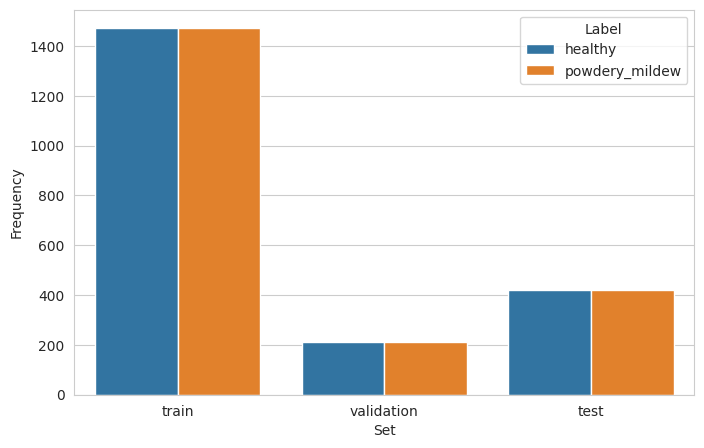

In [31]:
# Initialize a list to store the data
data = []

# Iterate through each set (train, validation, test)
for folder in ['train', 'validation', 'test']:
    # Iterate through each label within the folder
    for label in labels:
        path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(path):
            # Count the number of images in each label's directory
            image_count = len(os.listdir(path)) if os.path.exists(path) else 0

        # Append a new row to the data list with the count information
        data.append({'Set': folder, 'Label': label, 'Frequency': image_count})

        # Print out the count of images for each label within each set
        print(f"* {folder} - {label}: {image_count} images")

# Print a newline for neatness in output
print("\n")

# Create the DataFrame after collecting all data
df_freq = pd.DataFrame(data)

# Set the style of the plot to 'whitegrid' for better grid visibility
sns.set_style("whitegrid")

# Create a figure for the plot with specified size
plt.figure(figsize=(8, 5))

# Generate a bar plot from the frequency DataFrame
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

# Specify the file path to save the generated bar plot
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)

# Display the plot
plt.show()


__________________________________________________________________________________
### Data Augmentation
__________________________________________________________________________________

2. **Image data augmentation**

ImageDataGenerator

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Intiatize ImageDataGenerator

In [66]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset

In [67]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=(100, 100),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [68]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=(100, 100),
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [69]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=(100, 100),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Plot augmented training image

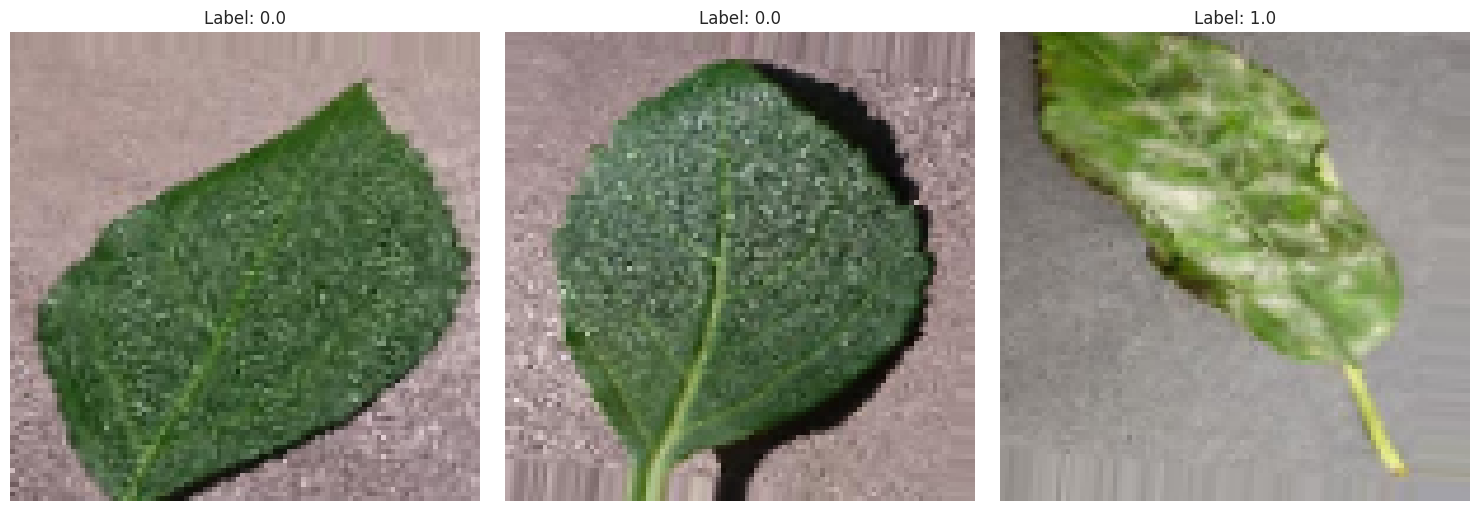

In [70]:
def plot_images(images_arr, labels_arr, num_images=3):
    """
    Take an array of images and labels, and an optional
    num_images parameter specifying how many images to plot
    """
    # Ensure not to try to plot more images than we have
    num_images = min(num_images, len(images_arr))

    # Set up the plot with one row and 'num_images' columns
    # Figure size is dynamically adjusted based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    if num_images == 1:
        axes = [axes]

    # Loop through the first 'num_images' images and plot them
    for i in range(num_images):
        # Get the subplot axis
        ax = axes[i]
        # Get the image
        img = images_arr[i]
        # Get the label
        label = labels_arr[i]
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title of the subplot to the image's label
        ax.set_title(f"Label: {label}")
        # Turn off the axis to only show the image
        ax.axis('off')

    # Adjust the layout so everything fits without overlapping
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the train_set iterator
images, labels = next(train_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

- Plot augmented validation and test images

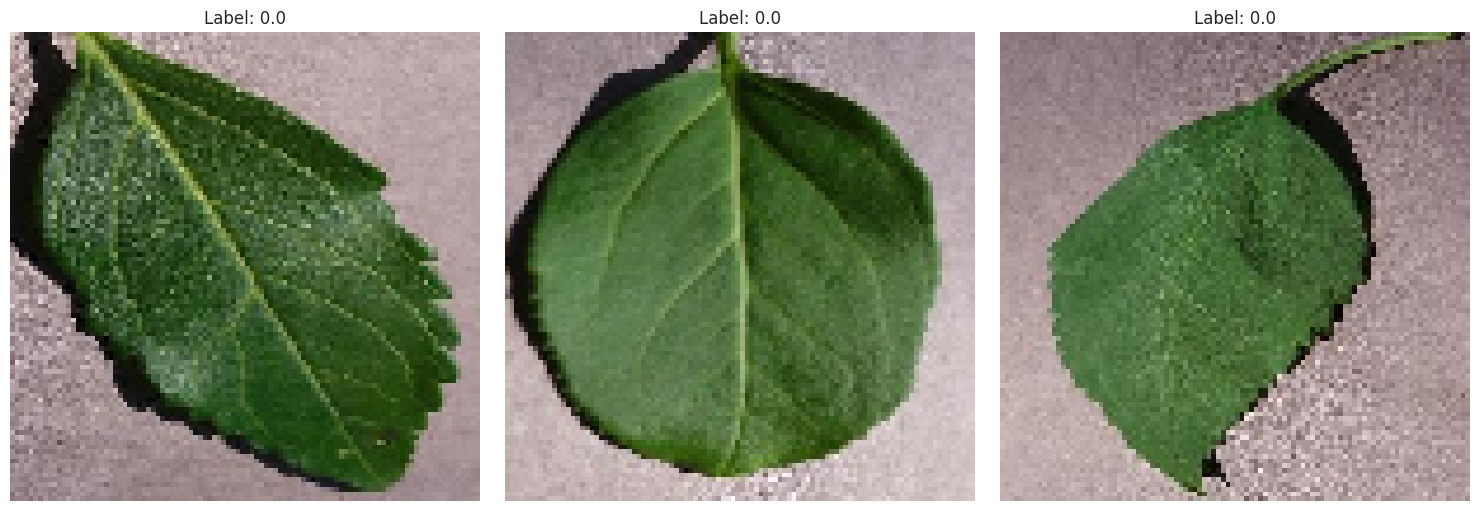

In [71]:
# Fetch a batch of images and labels from the validation_set iterator
images, labels = next(validation_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

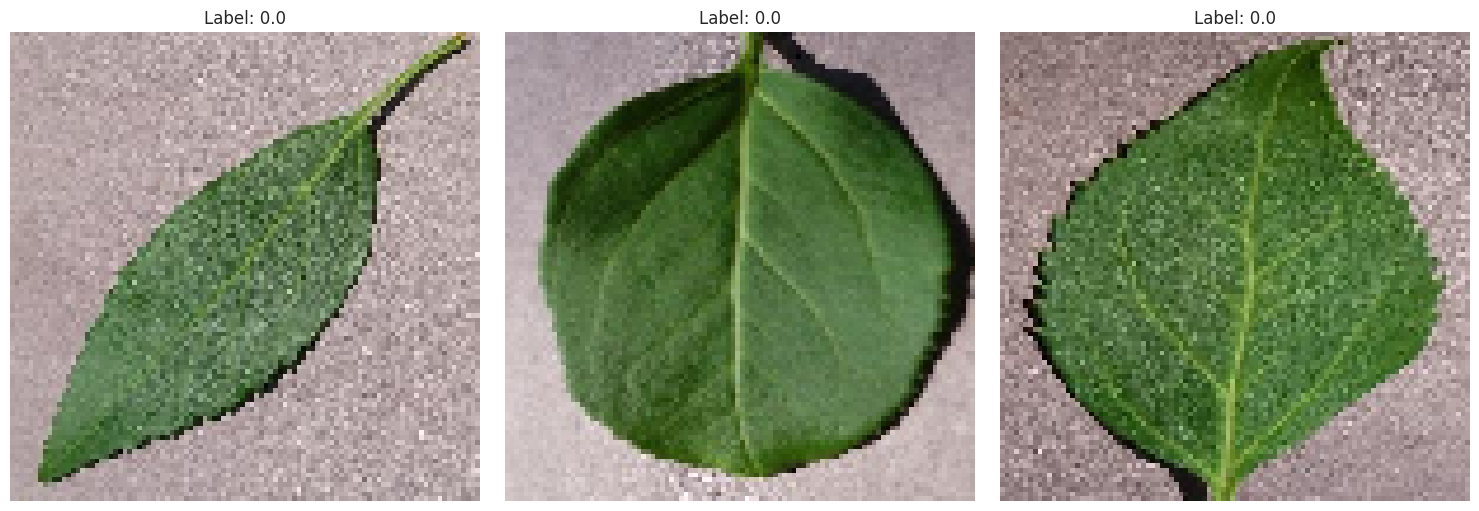

In [72]:
# Fetch a batch of images and labels from the test_set iterator
images, labels = next(test_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

3. **Save class_indices**

In [73]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

________________________________________________________________
### Model Creation and Training
________________________________________________________________

Import model packages


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
)
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from tensorflow.keras.preprocessing import image

4. **Machine learning model creation and training**

In [101]:
def create_tf_model(image_shape=(100, 100, 3), l2_reg=0.01):
    """
    Create a TensorFlow CNN model with specific hyperparameters.
    Adjust the model's complexity based on the dataset to prevent overfitting.
    """

    # model hyperparameters
    filters = [32, 64]
    kernel_size = (3, 3)
    activation = 'relu'
    dense_units = 64
    dropout_rate = 0.5

    # Initialize the Sequential model
    model = Sequential()

    # Add the Convolutional layers with GlobalAveragePooling2D and L2 Regularization
    model.add(Conv2D(filters=filters[0], kernel_size=kernel_size,
                     activation=activation, input_shape=image_shape,
                     padding='same', kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=filters[1], kernel_size=kernel_size,
                     activation=activation, padding='same',
                     kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)), GlobalAveragePooling2D())

    # Flatten the convolved images so we can connect them to Dense layers
    model.add(Flatten())

    # Add the Dense layers, including Dropout for regularization
    model.add(Dense(dense_units, activation=activation))
    model.add(Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and binary_crossentropy loss
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

Early Stopping and Learning Rate Scheduler

In [102]:
# Use a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate over time
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

Model Summary

In [103]:
model = create_tf_model()
model.summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,579,521 (9.84 MB)

 Trainable params: 2,579,521 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

Fit model for model training

In [112]:
model.fit(
    train_set,
    epochs=25,
    #steps_per_epoch=len(train_set) // batch_size,
    validation_data=validation_set,
    #validation_steps=len(validation_set) // batch_size,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/25


148/148 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.6608 - loss: 0.7324 - val_accuracy: 0.8786 - val_loss: 0.4061 - learning_rate: 0.0010
Epoch 2/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.8226 - loss: 0.3945 - val_accuracy: 0.9857 - val_loss: 0.1098 - learning_rate: 0.0010
Epoch 3/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9041 - loss: 0.2905
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9041 - loss: 0.2905 - val_accuracy: 0.9667 - val_loss: 0.1270 - learning_rate: 0.0010
Epoch 4/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9188 - loss: 0.2278 - val_accuracy: 0.9881 - val_loss: 0.0923 - learning_rate: 2.0000e-04
Epoch 5/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9480 - loss: 0.2213 - val_accuracy: 0.9881 - val_loss: 0.0813 - learning_rate: 2.0000e-04
Epoch 6/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9467 

5. **Save model**

In [113]:
model.save('outputs/v1/powdery_mildew_detector_model.keras')

_______________________________________________________________________________

### Model Performace
____________________________________________________________________________________

6. **Learning curve plot for model performance**

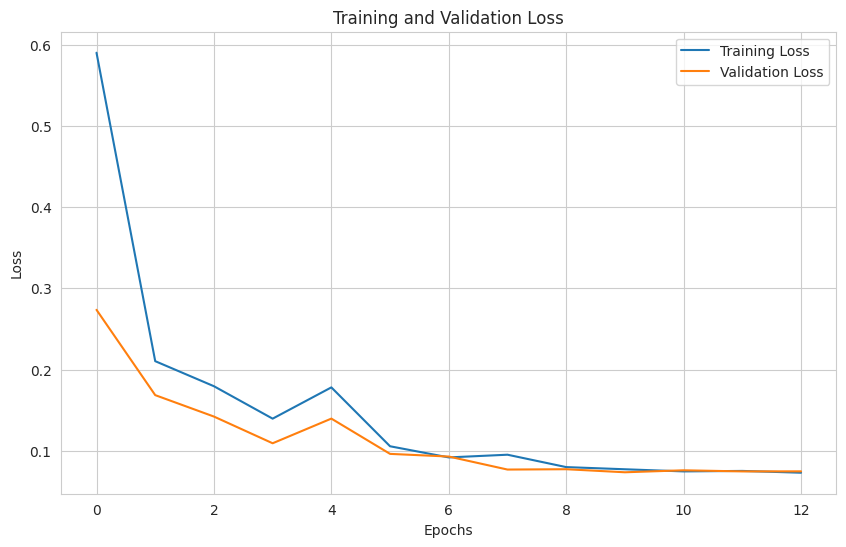

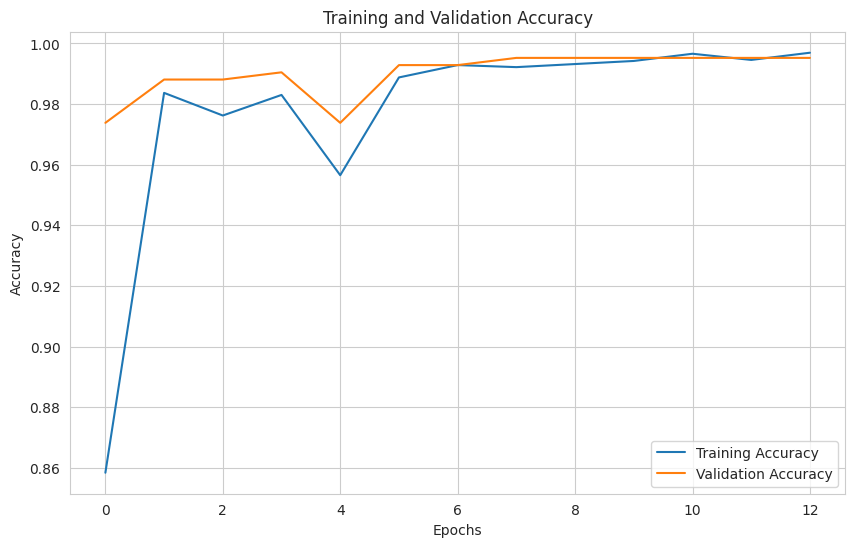

In [114]:
# Plot training history
def plot_training_history(history):
    # Plot for loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
    plt.show()

    # Plot for accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
    plt.show()

plot_training_history(history)

___________________________________________________________________________________
### Model Evaluation
___________________________________________________________________________________

Load saved model

In [115]:
model = load_model('outputs/v1/powdery_mildew_detector_model.keras')

7. **Model evaluation on pickle file**

Evaluate model on test set

In [116]:
evaluation = model.evaluate(test_set)

 1/43 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 1.0000 - loss: 0.0492

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9979 - loss: 0.0516


Save evaluation pickle

In [117]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

________________________________________________________________________________
### Predict on new data
________________________________________________________________________________

8. **Prediction on the random image file**

Set label names

In [189]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


Load a random image as PIL

Selected label for prediction: healthy
Image path for prediction: inputs/cherry_leaves_dataset/cherry-leaves/test/healthy/88fd947e-a850-4e0c-9dff-8984478b04e1___JR_HL 3984_flipTB.JPG
Image shape: (100, 100), Image mode: RGB


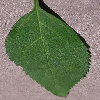

In [236]:
# Select the 201th image
pointer = 200

label = labels[1]
print("Selected label for prediction:", label)

image_shape=(100, 100, 3)

# Check if the label is a string.
if not isinstance(label, str):
    raise TypeError(f"Expected label to be a string, but got {type(label)}.")

# Get the list of files in the label's directory.
files = os.listdir(os.path.join(test_path, label))

# Check if pointer is within the range of files.
if not 0 <= pointer < len(files):
    raise IndexError(f"Pointer {pointer} is out of range for the number of files {len(files)}.")

# Load a random image from the test set.
pil_image_path = os.path.join(test_path, label, files[pointer])
pil_image = image.load_img(pil_image_path, target_size=image_shape, color_mode='rgb')

print("Image path for prediction:", pil_image_path)

print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [237]:
# Convert the PIL image to a numpy array
my_image = image.img_to_array(pil_image) / 255.0

# Preprocess the image for the model by adding a batch dimension
my_image = np.expand_dims(my_image, axis=0)
print(f'Preprocessed image shape: {my_image.shape}')

Preprocessed image shape: (1, 100, 100, 3)


Predict class probabilities

In [238]:
# Predict class probabilities using the model
pred_proba = model.predict(my_image)[0]
# Create a reversed mapping from indices to classes
target_map = {v: k for k, v in train_set.class_indices.items()}
# Get the index of the highest probability
pred_class_index = int(pred_proba > 0.5)
# Get the corresponding class label from target_map
pred_class = target_map[pred_class_index]
# Get the confidence of the prediction
pred_confidence = pred_proba if pred_class_index == 1 else 1 - pred_proba

print(f"Predicted class: {pred_class}, with probability: {pred_confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: healthy, with probability: [0.9951715]


/tmp/ipykernel_5136/2833015650.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class_index = int(pred_proba > 0.5)


___________________________________________________________________________________
### Push files to Repo
___________________________________________________________________________________

Push generated/new files from this Session to GitHub repo

- .gitignore

In [239]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.jsonvenv/
kaggle.json
inputs/cherry_leaves_dataset/cherry-leaves/train/
inputs/cherry_leaves_dataset/cherry-leaves/test/
inputs/cherry_leaves_dataset/cherry-leaves/validation/

- Git status

In [240]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/3-modelling-and-evaluating.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	outputs/v1/evaluation.pkl
	outputs/v1/model_training_acc.png
	outputs/v1/model_training_losses.png
	outputs/v1/powdery_mildew_detector_model.keras

no changes added to commit (use "git add" and/or "git commit -a")


- Git add

In [241]:

!git add .

- Git commit

In [ ]:
!git commit -am " Add new plots"

- Git Push

In [ ]:
!git push

__________________________________________________________________________________